In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [16]:
! kaggle datasets download apoorvaappz/global-super-store-dataset
! unzip global-super-store-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset
License(s): DbCL-1.0
Archive:  global-super-store-dataset.zip
  inflating: Global_Superstore2.csv  
  inflating: Global_Superstore2.xlsx  


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Global_Superstore2.csv', encoding='latin-1')

# # Basic cleaning
df.dropna(inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

purchase_freq = df.groupby('Customer ID')['Order ID'].nunique().sort_values(ascending=False)
purchase_freq.name = 'Purchase Frequency'

revenue_profit = df.groupby('Customer ID')[['Sales', 'Profit']].sum()

# Combine all
customer_profile = pd.concat([purchase_freq, revenue_profit], axis=1)
# Calculate profit margin
customer_profile['Profit Margin'] = customer_profile['Profit'] / customer_profile['Sales']
customer_profile = customer_profile.sort_values('Purchase Frequency', ascending=False)
customer_profile.head()


<ipython-input-42-e16ecb9ef315>:10: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-42-e16ecb9ef315>:11: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



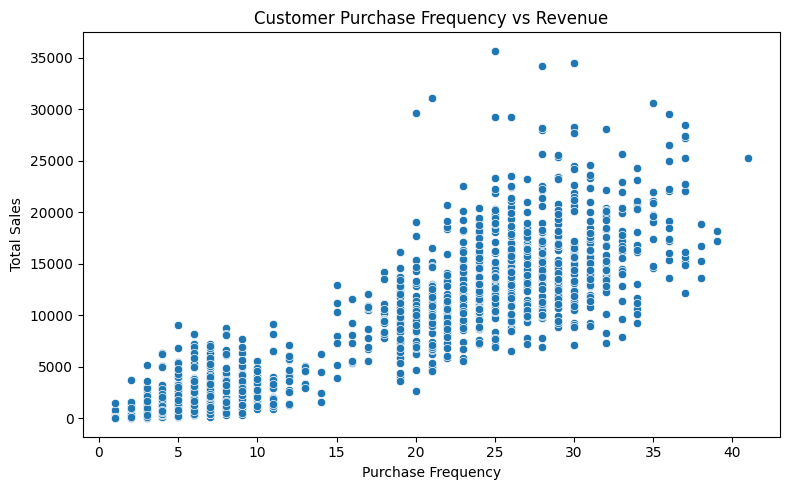

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=customer_profile, x='Purchase Frequency', y='Sales')
plt.title("Customer Purchase Frequency vs Revenue")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

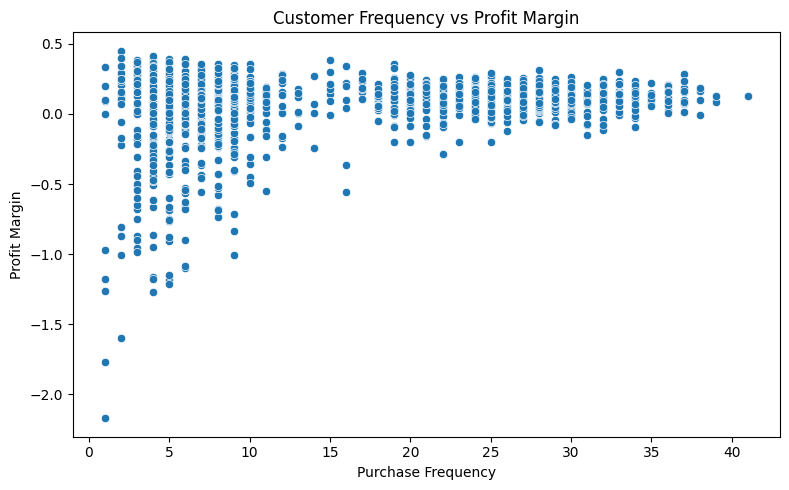

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=customer_profile, x='Purchase Frequency', y='Profit Margin')
plt.title("Customer Frequency vs Profit Margin")
plt.xlabel("Purchase Frequency")
plt.ylabel("Profit Margin")
plt.tight_layout()
plt.show()

In [50]:
df['Year'] = df['Order Date'].dt.year

segment_profit = df.groupby(['Year', 'Segment'])['Profit'].sum().reset_index()
most_profitable_segment = segment_profit.sort_values(['Year', 'Profit'], ascending=[True, False]).drop_duplicates(['Year'])

most_profitable_segment


,Year,Segment,Profit
0,2011,Consumer,24319.8504
3,2012,Consumer,28460.1665
6,2013,Consumer,35758.2694
9,2014,Consumer,45580.9229


In [51]:
import plotly.express as px

yearly_top5_products = df.groupby(['Year', 'Sub-Category'])['Profit'].sum().reset_index()

fig = px.bar(yearly_top5_products, x='Sub-Category', y='Profit', color='Year',
             title="Top 5 Profit-Making Sub-Categories per Year", barmode='group')
fig.show()

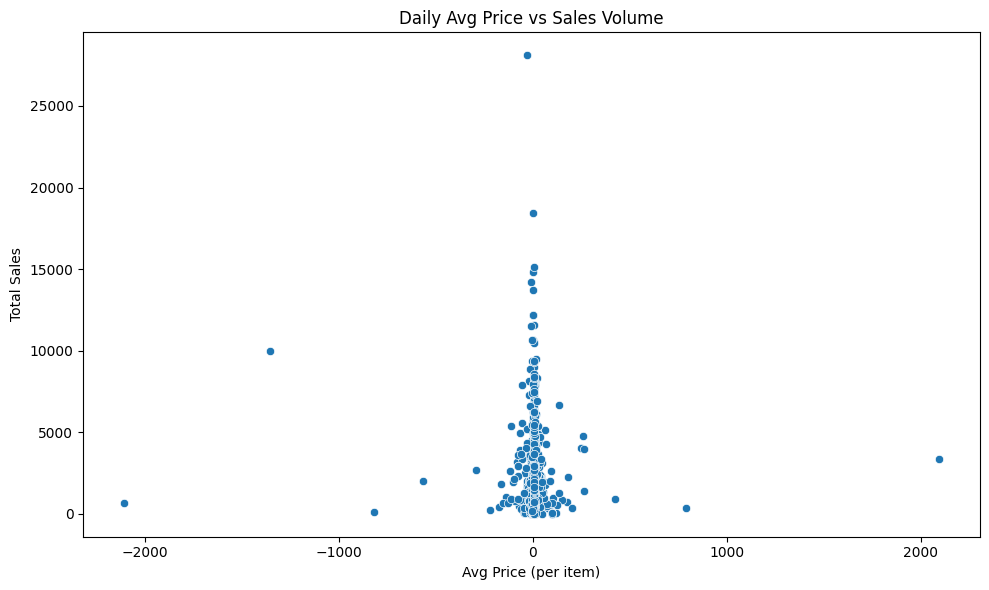

In [54]:

daily_data = df.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()
daily_data['Avg_Price'] = daily_data['Sales'] / daily_data['Profit']
plt.figure(figsize=(10,6))
sns.scatterplot(data=daily_data, x='Avg_Price', y='Sales')
plt.title("Daily Avg Price vs Sales Volume")
plt.xlabel("Avg Price (per item)")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()